### PARTIE 1: Part 1: Graph representation in Python

In [7]:
graph = {}


In [8]:
graph["Mike"] = []


In [9]:
graph["Amine"] = []
graph["Rémi"] = []
graph["Nick"] = []


In [10]:
graph["Mike"].append("Amine")
graph["Amine"].append("Rémi")
graph["Rémi"].append("christoph")


In [11]:
graph

{'Mike': ['Amine'], 'Amine': ['Rémi'], 'Rémi': ['christoph'], 'Nick': []}

### PARITE 2:  Calculating centrality metrics using Python

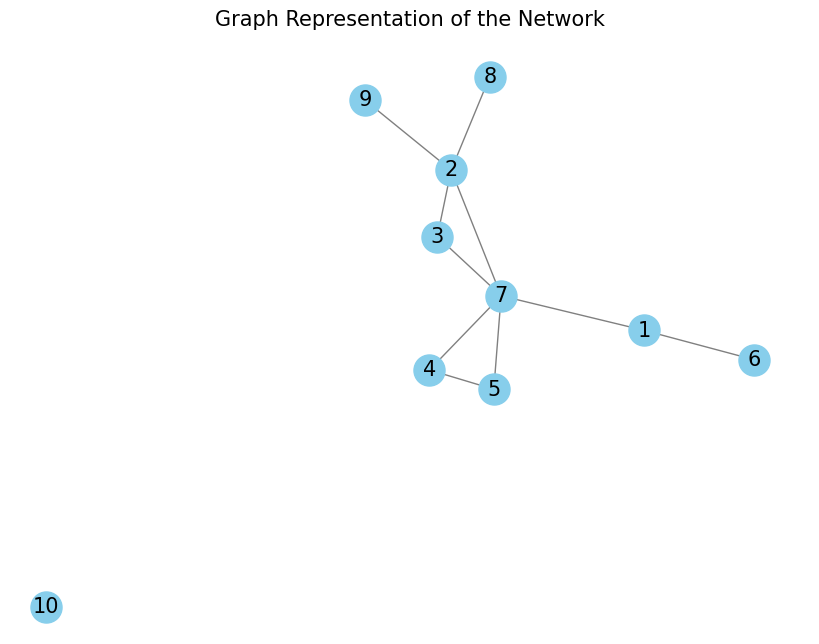

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the vertices and edges
vertices = range(1, 11)
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6), (1,7), (2,8), (2,9)]

# Create the graph
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Position the nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', linewidths=1, font_size=15)
plt.title("Graph Representation of the Network", size=15)
plt.show()


In [13]:
# 1. Degree Centrality
degree_centrality = nx.degree_centrality(G)

# 2. Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# 3. Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Display results
centrality_results = {
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality
}

for key, value in centrality_results.items():
    print(f"{key}:\n{value}\n")


Degree Centrality:
{1: 0.2222222222222222, 2: 0.4444444444444444, 3: 0.2222222222222222, 4: 0.2222222222222222, 5: 0.2222222222222222, 6: 0.1111111111111111, 7: 0.5555555555555556, 8: 0.1111111111111111, 9: 0.1111111111111111, 10: 0.0}

Betweenness Centrality:
{1: 0.19444444444444442, 2: 0.3611111111111111, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.5555555555555556, 8: 0.0, 9: 0.0, 10: 0.0}

Closeness Centrality:
{1: 0.4444444444444444, 2: 0.5470085470085471, 3: 0.47407407407407404, 4: 0.4183006535947712, 5: 0.4183006535947712, 6: 0.30917874396135264, 7: 0.6464646464646464, 8: 0.35555555555555557, 9: 0.35555555555555557, 10: 0.0}



Le score de centralité de la personne 7 est plus élevée que pour les autres donc elle est la personne la plus connecteés aux autres memebres du reseau
La personne 7 est celle avec la plus grande probabilté d'etre sur l'itineraire directe entre deux personnes
La personne 7 est egalment celle la plus suceptible de toucher le réseau rapidemen t


# **PARTIE 3 : FRAUD ANALYTICS **

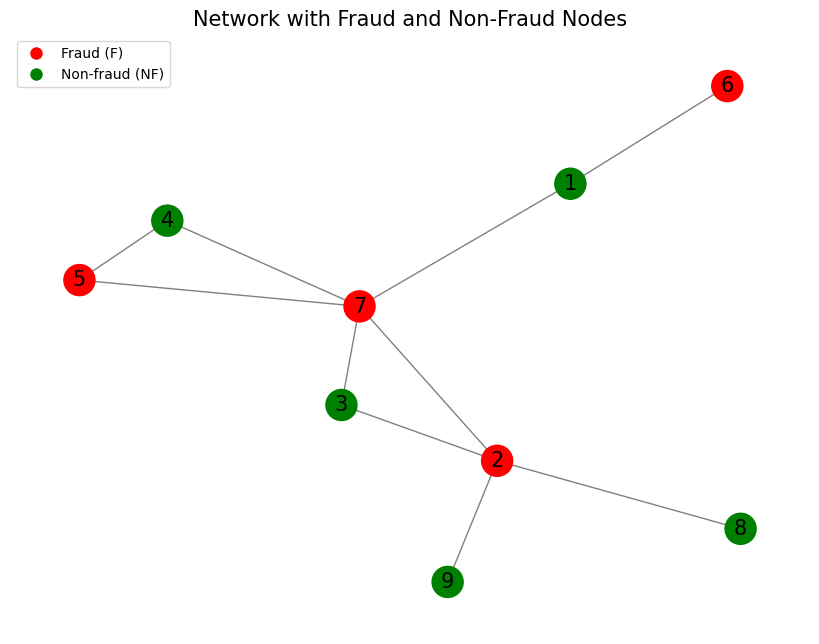

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the vertices and edges
vertices = range(1, 10)
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6), (1,7), (2,8), (2,9)]

# Define fraud (F) and non-fraud (NF) nodes
fraud_nodes = [2, 5, 6, 7]
non_fraud_nodes = [1, 3, 4, 8, 9]

# Create the graph
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)

# Assign colors based on fraud (F) and non-fraud (NF) classification
color_map = []
for node in G.nodes():
    if node in fraud_nodes:
        color_map.append('red')  # Red for fraud (F)
    else:
        color_map.append('green')  # Green for non-fraud (NF)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Position the nodes
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=500, edge_color='gray', linewidths=1, font_size=15)

# Create a legend for the node colors
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Fraud (F)', markerfacecolor='red', markersize=10)
green_patch = plt.Line2D([0], [0], marker='o', color='w', label='Non-fraud (NF)', markerfacecolor='green', markersize=10)
plt.legend(handles=[red_patch, green_patch])

plt.title("Network with Fraud and Non-Fraud Nodes", size=15)
plt.show()


In [17]:
def calculate_fraud_probability(G, q, fraud_nodes):
    # Get the degree of node 'q'
    degree_q = G.degree(q)

    # Avoid division by zero
    if degree_q == 0:
        return 0

    # Sum weights of connections to fraud nodes
    fraud_weight = sum(G[q][neighbor]['weight'] for neighbor in G.neighbors(q) if neighbor in fraud_nodes)

    # Calculate the probability
    probability = fraud_weight / degree_q
    return probability

In [21]:
G.add_node(10)
G.add_edges_from([(10, 1), (10, 5),(10,7)])

In [22]:
q = 10
for edge in G.edges():
    G[edge[0]][edge[1]]['weight'] = 1
prob_fraud_q = calculate_fraud_probability(G, q, fraud_nodes)
print(f"La probabilité que le nœud 'q' soit impliqué dans une fraude est : {prob_fraud_q}")

# Déterminer si le nœud 'q' est considéré comme frauduleux
T = 0.5  # Seuil de fraude (par exemple)
if prob_fraud_q > T:
    fraud_nodes.append(q)
    color_map.append('red')  # Ajouter 'q' comme fraude dans la color map
else:
    non_fraud_nodes.append(q)
    color_map.append('green')  # Ajouter 'q' comme non-fraude dans la color map


La probabilité que le nœud 'q' soit impliqué dans une fraude est : 0.6666666666666666


In [ ]:
DOS_values = {}
for node in fraud_nodes:
    # Calculer la moyenne des centralités pour chaque nœud frauduleux
    centrality_mean = np.mean([
        degree_centrality[node],
        betweenness_centrality[node],
        closeness_centrality[node],
        eigenvector_centrality[node]
    ])

    # Calculer le DOS
    DOS = centrality_mean * score_negatif
    DOS_values[node] = DOS


In [25]:
# Define the vertices and edges
vertices = range(1, 11)
edges = [(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6), (1,7), (2,8), (2,9)]

# Create the graph
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)
# Définir les noeuds frauduleux et non-frauduleux
fraud_nodes = [2, 5, 6, 7]
non_fraud_nodes = [1, 3, 4, 8, 9]

# Définir un score de résultat négatif générique pour les nœuds frauduleux
negative_score_generic = 8

# Calculer les centralités
degree_cent = nx.degree_centrality(G)
betweenness_cent = nx.betweenness_centrality(G)
closeness_cent = nx.closeness_centrality(G)
eigenvector_cent = nx.eigenvector_centrality(G)

# Calculer le Degré de Suspicion (DOS)
DOS_values = {}
for node in G.nodes():
    # Moyenne des centralités
    centrality_avg = (degree_cent[node] + betweenness_cent[node] + closeness_cent[node] + eigenvector_cent[node]) / 4

    # Calculer le DOS
    if node in fraud_nodes:
        DOS = centrality_avg * negative_score_generic
    else:
        DOS = centrality_avg * 0  # Aucun score négatif pour les non-frauduleux

    DOS_values[node] = DOS

# Normalisation du DOS
max_DOS = max(DOS_values.values())
for node in DOS_values:
    DOS_values[node] /= max_DOS  # Normalisation

# Affichage des résultats
for node, dos in DOS_values.items():
    print(f"Nœud {node}: DOS normalisé = {dos:.2f}")

Nœud 1: DOS normalisé = 0.00
Nœud 2: DOS normalisé = 0.77
Nœud 3: DOS normalisé = 0.00
Nœud 4: DOS normalisé = 0.00
Nœud 5: DOS normalisé = 0.41
Nœud 6: DOS normalisé = 0.21
Nœud 7: DOS normalisé = 1.00
Nœud 8: DOS normalisé = 0.00
Nœud 9: DOS normalisé = 0.00
Nœud 10: DOS normalisé = 0.00


In [29]:
G.add_node(10)
G.add_edges_from([(10, 1), (10, 5),(10,7)])
normalized_DOS=DOS_values
def calculate_DOS_new_node(G, node, normalized_DOS):
    degree = G.degree(node)
    if degree == 0:
        return 0

    # Calcul de la somme pondérée
    weighted_sum = sum(1 * normalized_DOS[neighbor] for neighbor in G.neighbors(node))

    # DOS du nœud
    DOS = (1 / degree) * weighted_sum
    return DOS

# Calcul du DOS pour le nœud 10
DOS_node_10 = calculate_DOS_new_node(G, 10, normalized_DOS)

print("Degré de Suspicion (DOS) pour le nœud 10:", DOS_node_10)

Degré de Suspicion (DOS) pour le nœud 10: 0.46963430361024805


In [ ]:
conclusion la 10 e personne have a high risk to be implicated in the fraud  car le degré de suspicion dos >> 0.3